In [61]:
import straug
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [62]:
import random
import cv2
import albumentations as A
import numpy as np

# class geometry flip,rotate,perspective

"""
class geometry:
    def __init__(self):
        self.degree = random.randint(1, 30)

    def rotate(self, image, bbox):
        h, w, c = image.shape
        cx, cy = w / 2, h / 2
"""


class noise:
    def __init__(self):
        self.transform = A.OneOf(
            [
                A.GaussNoise(p=1),
            ],
            p=1,
        )

    def __call__(self, image):
        return self.transform(image=image)["image"]


class blur:
    def __init__(self):
        self.transform = A.OneOf(
            [
                #A.GaussianBlur(p=1),
                A.MotionBlur(p=1),
                #A.Defocus(p=1),
                #A.GlassBlur(p=1, max_delta=1, iterations=1),
            ],
            p=1,
        )

    def __call__(self, image):
        return self.transform(image=image)["image"]


class weather:
    def __init__(self):
        self.transform = A.OneOf(
            [
                A.RandomRain(p=1),
                #A.RandomSnow(p=1),
                A.RandomFog(p=1),
                A.RandomShadow(p=1),
            ],
            p=1,
        )

    def __call__(self, image):
        return self.transform(image=image)["image"]


class camera:
    def __init__(self):
        self.transform = A.OneOf(
            [
                A.RandomBrightnessContrast(p=1),
                A.JpegCompression(p=1),
            ],
            p=1,
        )

    def __call__(self, image):
        return self.transform(image=image)["image"]


class process:
    def __init__(self):
        self.transform = A.OneOf(
            [
                A.Posterize(p=1),
                A.Equalize(p=1),
                A.Solarize(p=1),
                A.InvertImg(p=1),
            ],
            p=1,
        )

    def __call__(self, image):
        return self.transform(image=image)["image"]


class augment:
    def __init__(self, img_size):
        self.img_size = img_size
        # self.geometry = geometry()
        self.blur = blur()
        self.noise = noise()
        self.weather = weather()
        self.camera = camera()
        self.process = process()

    def _resize(self, img: np.array, annotation):
        h, w, _ = img.shape
        size=self.img_size
        ratio = size / max(h, w)
        if w > h:
            img = A.Resize(int(h*ratio),size)(image=img)["image"]
            #img = img.resize((size, int(h * ratio)), Image.BILINEAR)
        else:
            img = A.Resize(size,(int(w*ratio)))(image=img)["image"]
            #img = img.resize((int(w * ratio), size), Image.BILINEAR)
        for ann in annotation:
            for pts in ann:
                pts[0]*=ratio
                pts[1]*=ratio
        return img,annotation

    def __call__(self, img, annotation, label):
        transform_list = random.sample(
            [
                # self.geometry,
                self.noise,
                self.weather,
                self.camera,
                self.process,
                self.blur,
            ],
            2,
        )
        for transform in transform_list:
            print(transform)
            img = transform(img)

        img,annotation = self._resize(img,annotation)
        # geometry적용시 bbox, annotation 변경
        return dict(img=img,annotation=annotation,label=label)


# Rotate

# Perpective

# Distort

#


In [63]:
img=cv2.imread('input/data/ICDAR17/images/img_1.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
transform=augment(1024)
bboxes=[[[28,194],[79,193],[79,218],[28,219]],
      [[55,62],[185,57],[186,102],[54,109]],
      [[197,55],[303,40],[313,87],[201,95]],
      [[226,112],[305,111],[306,157],[227,158]],
      [[193,129],[212,128],[213,162],[194,162]],
      [[102,123],[180,123],[180,173],[102,173]],
      [[86,191],[142,191],[139,214],[84,214]],
      [[149,186],[226,182],[221,208],[148,213]],
      [[230,182],[310,180],[310,205],[230,205]],
      [[172,243],[208,250],[208,265],[171,265]],
      [[107,249],[149,248],[148,264],[124,265]],
]
res=transform(img,bboxes,[])
img=res['img']
bboxes=res['annotation']
bboxes=np.array(bboxes,dtype=np.int32)
for bbox in bboxes:

      img = cv2.polylines(img, [bbox], True, (255, 0, 0), 3)

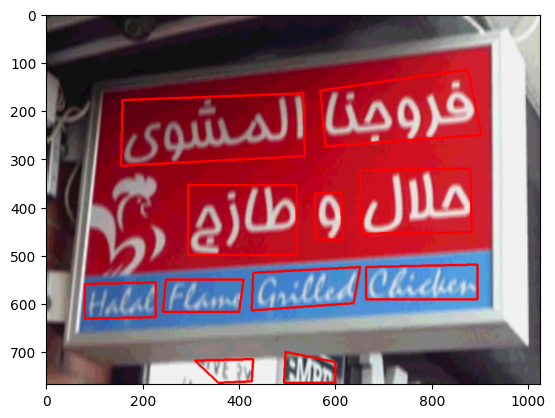

In [64]:
plt.imshow(img)